In [26]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
from numpy.linalg import inv

N = 1000 # number of time steps
dt = 0.01 # Sampling time (s)
t = dt*np.arange(N)

F = np.array([[1, dt],[ 0, 1]])# system matrix - state
B = np.array([[-1/2*dt**2],[ -dt]])# system matrix - input
H = np.array([[1, 0]])#; % observation matrix
Q = np.array([[0.1,0],[0,0.11]]) 


u = 9.80665# % input = acceleration due to gravity (m/s^2)
I = np.array([[1,0],[0,1]])  #identity matrix

# Define the initial position and velocity
y0 = 100; # m
v0 = 0; # m/s
G2 = np.array([-1/2*dt**2, -dt])# system matrix - input

# Initialize the state vector (true state)
xt = np.zeros((2, N)) # True state vector

xt[:,0] = [y0,v0]

for k in range(1,N):
    xt[:,k] = np.dot(F,xt[:,k-1]) +G2*u

    #Generate the noisy measurement from the true state
R = 100 # % m^2/s^2
v = np.sqrt(R)*np.random.randn(N) #% measurement noise
z = np.dot(H,xt) + v; #% noisy measurement
R2=4
z.shape


(1, 1000)

[[0.00049033]
 [0.0980665 ]]
(1000, 2, 1)


Text(0, 0.5, '$X_t$ = h[m]')

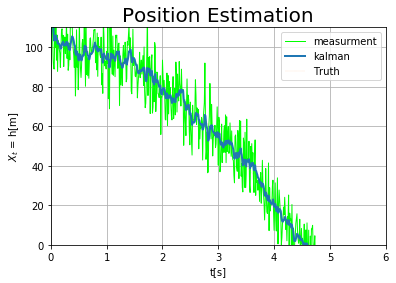

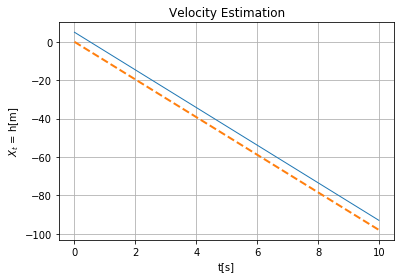

In [28]:
#% Initialize the covariance matrix
P = np.array([[10, 0], [0, 20]])# Covariance for initial state error
#% Loop through and perform the Kalman filter equations recursively

x_list =[]


x_kalman= np.array([[107],[5]])
x_list.append(x_kalman)
print(-B*u)
for k in range(1,N):
    x_kalman=np.dot(F,x_kalman) +B*u
    P = F*P*F.T+Q
    S=(np.dot(np.dot(H,P),H.T) + R2)
    S2 = inv(S)
    K = np.dot(P,H.T)*S2
    x_kalman = x_kalman +K*((z[:,k]- np.dot(H,x_kalman)))
    P = (I - K*H)*P
    x_list.append(x_kalman)   
x_array = np.array(x_list)
print(x_array.shape)

plt.figure()
plt.plot(t,z[0,:], label="measurment", color='LIME', linewidth=1)
plt.plot(t,x_array[:,0,:],label="kalman",linewidth=2)
plt.plot(t,xt[0,:],linestyle='--', label = "Truth",linewidth=0.1)
plt.legend(fontsize=10)
plt.grid(True)
plt.xlabel("t[s]")
plt.title("Position Estimation", fontsize=20)
plt.ylabel("$X_t$ = h[m]")
plt.gca().set( ylim=(0, 110))
plt.gca().set(xlim=(0,6))

plt.figure()
# plt.plot(t,z, label="measurment", color='LIME')
plt.plot(t,x_array[:,1,:],label="kalman",linewidth=1)
plt.plot(t,xt[1,:],linestyle='--', label = "Truth",linewidth=2)
# plt.legend()
plt.grid(True)
plt.xlabel("t[s]")
plt.title("Velocity Estimation")
plt.ylabel("$X_t$ = h[m]")

[[0.00049033]
 [0.0980665 ]]
(1000, 2, 1)


Text(0, 0.5, '$X_t$ = h[m]')

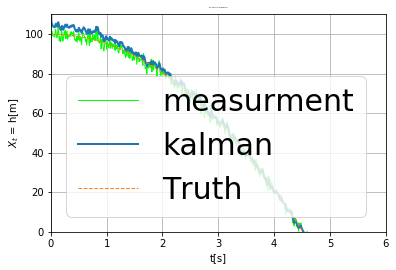

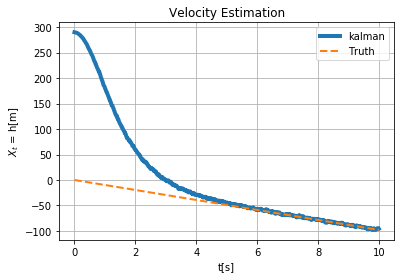

In [30]:
N = 1000 # number of time steps
dt = 0.01 # Sampling time (s)
t = dt*np.arange(N)

F = np.array([[1, dt],[ 0, 1]])# system matrix - state
B = np.array([[-1/2*dt**2],[ -dt]])# system matrix - input
H = np.array([[1, 0]])#; % observation matrix
Q = np.array([[1,0],[0,1]]) 


u = 9.80665# % input = acceleration due to gravity (m/s^2)
I = np.array([[1,0],[0,1]])  #identity matrix

# Define the initial position and velocity
y0 = 100; # m
v0 = 0; # m/s
G2 = np.array([-1/2*dt**2, -dt])# system matrix - input

# Initialize the state vector (true state)
xt = np.zeros((2, N)) # True state vector

xt[:,0] = [y0,v0]

for k in range(1,N):
    xt[:,k] = np.dot(F,xt[:,k-1]) +G2*u

    #Generate the noisy measurement from the true state
R = 4 # % m^2/s^2
v = np.sqrt(R)*np.random.randn(N) #% measurement noise
z = np.dot(H,xt) + v; #% noisy measurement
R2=4


#% Initialize the covariance matrix
P = np.array([[10, 0], [0, 0.1]])# Covariance for initial state error
#% Loop through and perform the Kalman filter equations recursively

x_list =[]


x_kalman= np.array([[117],[290]])
x_list.append(x_kalman)
print(-B*u)
for k in range(1,N):
    x_kalman=np.dot(F,x_kalman) +B*u
    P = np.dot(np.dot(F,P),F.T) +Q
    S=(np.dot(np.dot(H,P),H.T) + R2)
    S2 = inv(S)
    K = np.dot(P,H.T)*S2
    x_kalman = x_kalman +K*((z[:,k]- np.dot(H,x_kalman)))
    P = np.dot((I - K*H),P)
    x_list.append(x_kalman)   
x_array = np.array(x_list)
print(x_array.shape)

plt.figure()
plt.plot(t,z[0,:], label="measurment", color='LIME', linewidth=1)
plt.plot(t,x_array[:,0,:],label="kalman",linewidth=2)
plt.plot(t,xt[0,:],linestyle='--', label = "Truth",linewidth=1)
plt.legend(fontsize=30)
plt.grid(True)
plt.xlabel("t[s]")
plt.title("Position Estimation", fontsize=2)
plt.ylabel("$X_t$ = h[m]")
plt.gca().set( ylim=(0, 110))
plt.gca().set(xlim=(0,6))

plt.figure()
#plt.plot(t,z, label="measurment", color='LIME')
plt.plot(t,x_array[:,1,:],label="kalman",linewidth=4)
plt.plot(t,xt[1,:],linestyle='--', label = "Truth",linewidth=2)
plt.legend()
plt.grid(True)
plt.xlabel("t[s]")
plt.title("Velocity Estimation")
plt.ylabel("$X_t$ = h[m]")

In [31]:
from pykalman import KalmanFilter
kf = KalmanFilter(initial_state_mean=0, n_dim_obs=2)

In [33]:
measurements = [[1,0], [0,0], [0,1]]
kf.em(measurements).smooth([[2,0], [2,1], [2,2]])

(array([[0.73942012],
        [1.6817879 ],
        [2.12490761]]), array([[[0.00427132]],
 
        [[0.04350314]],
 
        [[0.067509  ]]]))

In [36]:
from scipy.stats import norm
import numpy as np
states = np.zeros((n_timesteps, n_dim_state))
measurements = np.zeros((n_timesteps, n_dim_obs))
for t in range(n_timesteps-1):
    if t == 0:
        states[t] = norm.rvs(initial_state_mean, np.sqrt(initial_state_covariance))
        measurements[t] = (
          np.dot(observation_matrices[t], states[t])
          + observation_offsets[t]
          + norm.rvs(0, np.sqrt(observation_covariance))
      )
    states[t+1] = (
      np.dot(transition_matrices[t], states[t])
      + transition_offsets[t]
      + norm.rvs(0, np.sqrt(transition_covariance))
  )
    measurements[t+1] = (
      np.dot(observation_matrices[t+1], states[t+1])
      + observation_offsets[t+1]
      + norm.rvs(np.sqrt(observation_covariance))
  )

NameError: name 'n_timesteps' is not defined

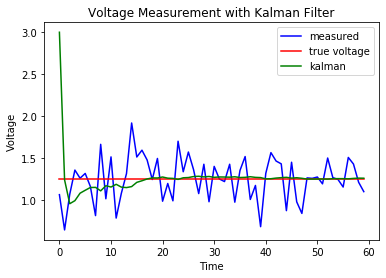

In [39]:
import random
import numpy
import pylab

class KalmanFilterLinear:
    def __init__(self,_A, _B, _H, _x, _P, _Q, _R):
        self.A = _A                      # State transition matrix.
        self.B = _B                      # Control matrix.
        self.H = _H                      # Observation matrix.
        self.current_state_estimate = _x # Initial state estimate.
        self.current_prob_estimate = _P  # Initial covariance estimate.
        self.Q = _Q                      # Estimated error in process.
        self.R = _R                      # Estimated error in measurements.
    def GetCurrentState(self):
        return self.current_state_estimate
    def Step(self,control_vector,measurement_vector):
        #---------------------------Prediction step-----------------------------
        predicted_state_estimate = self.A * self.current_state_estimate + self.B * control_vector
        predicted_prob_estimate = (self.A * self.current_prob_estimate) * numpy.transpose(self.A) + self.Q
        #--------------------------Observation step-----------------------------
        innovation = measurement_vector - self.H*predicted_state_estimate
        innovation_covariance = self.H*predicted_prob_estimate*numpy.transpose(self.H) + self.R
        #-----------------------------Update step-------------------------------
        kalman_gain = predicted_prob_estimate * numpy.transpose(self.H) * numpy.linalg.inv(innovation_covariance)
        self.current_state_estimate = predicted_state_estimate + kalman_gain * innovation
        # We need the size of the matrix so we can make an identity matrix.
        size = self.current_prob_estimate.shape[0]
        # eye(n) = nxn identity matrix.
        self.current_prob_estimate = (numpy.eye(size)-kalman_gain*self.H)*predicted_prob_estimate

class Voltmeter:
    def __init__(self,_truevoltage,_noiselevel):
        self.truevoltage = _truevoltage
        self.noiselevel = _noiselevel
    def GetVoltage(self):
        return self.truevoltage
    def GetVoltageWithNoise(self):
        return random.gauss(self.GetVoltage(),self.noiselevel)

numsteps = 60

A = numpy.matrix([1])
H = numpy.matrix([1])
B = numpy.matrix([0])
Q = numpy.matrix([0.00001])
R = numpy.matrix([0.1])
xhat = numpy.matrix([3])
P    = numpy.matrix([1])

filter = KalmanFilterLinear(A,B,H,xhat,P,Q,R)
voltmeter = Voltmeter(1.25,0.25)

measuredvoltage = []
truevoltage = []
kalman = []

for i in range(numsteps):
    measured = voltmeter.GetVoltageWithNoise()
    measuredvoltage.append(measured)
    truevoltage.append(voltmeter.GetVoltage())
    kalman.append(filter.GetCurrentState()[0,0])
    filter.Step(numpy.matrix([0]),numpy.matrix([measured]))

pylab.plot(range(numsteps),measuredvoltage,'b',range(numsteps),truevoltage,'r',range(numsteps),kalman,'g')
pylab.xlabel('Time')
pylab.ylabel('Voltage')
pylab.title('Voltage Measurement with Kalman Filter')
pylab.legend(('measured','true voltage','kalman'))
pylab.show()

In [42]:
# kalman2.py
# written by Greg Czerniak (email is greg {aT] czerniak [dOt} info )
#
# Implements a multi-variable linear Kalman filter.
#
# Note: This code is part of a larger tutorial "Kalman Filters for Undergrads"
# located at http://greg.czerniak.info/node/5.

import pylab
import math
import random
import numpy

# Implements a linear Kalman filter.
class KalmanFilterLinear:
    def __init__(self,_A, _B, _H, _x, _P, _Q, _R):
        self.A = _A                      # State transition matrix.
        self.B = _B                      # Control matrix.
        self.H = _H                      # Observation matrix.
        self.current_state_estimate = _x # Initial state estimate.
        self.current_prob_estimate = _P  # Initial covariance estimate.
        self.Q = _Q                      # Estimated error in process.
        self.R = _R                      # Estimated error in measurements.
    def GetCurrentState(self):
        return self.current_state_estimate
    def Step(self,control_vector,measurement_vector):
        #---------------------------Prediction step-----------------------------
        predicted_state_estimate = self.A * self.current_state_estimate + self.B * control_vector
        predicted_prob_estimate = (self.A * self.current_prob_estimate) * numpy.transpose(self.A) + self.Q
        #--------------------------Observation step-----------------------------
        innovation = measurement_vector - self.H*predicted_state_estimate
        innovation_covariance = self.H*predicted_prob_estimate*numpy.transpose(self.H) + self.R
        #-----------------------------Update step-------------------------------
        kalman_gain = predicted_prob_estimate * numpy.transpose(self.H) * numpy.linalg.inv(innovation_covariance)
        self.current_state_estimate = predicted_state_estimate + kalman_gain * innovation
        # We need the size of the matrix so we can make an identity matrix.
        size = self.current_prob_estimate.shape[0]
        # eye(n) = nxn identity matrix.
        self.current_prob_estimate = (numpy.eye(size)-kalman_gain*self.H)*predicted_prob_estimate

# Simulates the classic physics problem of a cannon shooting a ball in a
# parabolic arc.  In addition to giving "true" values back, you can also ask
# for noisy values back to test Kalman filters.
class Cannon:
  #--------------------------------VARIABLES----------------------------------
    angle = 45 # The angle from the ground to point the cannon.
    muzzle_velocity = 100 # Muzzle velocity of the cannon.
    gravity = [0,-9.81] # A vector containing gravitational acceleration.
    # The initial velocity of the cannonball
    velocity = [muzzle_velocity*math.cos(angle*math.pi/180), muzzle_velocity*math.sin(angle*math.pi/180)]
    loc = [0,0] # The initial location of the cannonball.
    acceleration = [0,0] # The initial acceleration of the cannonball.
    #---------------------------------METHODS-----------------------------------
    def __init__(self,_timeslice,_noiselevel):
        self.timeslice = _timeslice
        self.noiselevel = _noiselevel
    def add(self,x,y):
        return x + y
    def mult(self,x,y):
        return x * y
    def GetX(self):
        return self.loc[0]
    def GetY(self):
        return self.loc[1]
    def GetXWithNoise(self):
        return random.gauss(self.GetX(),self.noiselevel)
    def GetYWithNoise(self):
        return random.gauss(self.GetY(),self.noiselevel)
    def GetXVelocity(self):
        return self.velocity[0]
    def GetYVelocity(self):
        return self.velocity[1]
        # Increment through the next timeslice of the simulation.
    def Step(self):
        # We're gonna use this vector to timeslice everything.
        timeslicevec = [self.timeslice,self.timeslice]
        # Break gravitational force into a smaller time slice.
        sliced_gravity = map(self.mult,self.gravity,timeslicevec)
        # The only force on the cannonball is gravity.
        sliced_acceleration = sliced_gravity
        # Apply the acceleration to velocity.
        self.velocity = map(self.add, self.velocity, sliced_acceleration)
        sliced_velocity = map(self.mult, self.velocity, timeslicevec )
        # Apply the velocity to location.
        self.loc = map(self.add, self.loc, sliced_velocity)
        # Cannonballs shouldn't go into the ground.
        if self.loc[1] < 0:
            self.loc[1] = 0

#=============================REAL PROGRAM START================================
# Let's go over the physics behind the cannon shot, just to make sure it's
# correct:
# sin(45)*100 = 70.710 and cos(45)*100 = 70.710
# vf = vo + at
# 0 = 70.710 + (-9.81)t
# t = 70.710/9.81 = 7.208 seconds for half
# 14.416 seconds for full journey
# distance = 70.710 m/s * 14.416 sec = 1019.36796 m

timeslice = 0.1 # How many seconds should elapse per iteration?
iterations = 144 # How many iterations should the simulation run for?
# (notice that the full journey takes 14.416 seconds, so 145 iterations will
# cover the whole thing when timeslice = 0.10)
noiselevel = 30  # How much noise should we add to the noisy measurements?
muzzle_velocity = 100 # How fast should the cannonball come out?
angle = 45 # Angle from the ground.

# These are arrays to store the data points we want to plot at the end.
x = []
y = []
nx = []
ny = []
kx = []
ky = []

# Let's make a cannon simulation.
c = Cannon(timeslice,noiselevel)

speedX = muzzle_velocity*math.cos(angle*math.pi/180)
speedY = muzzle_velocity*math.sin(angle*math.pi/180)

# This is the state transition vector, which represents part of the kinematics.
# 1, ts, 0,  0  =>  x(n+1) = x(n) + vx(n)
# 0,  1, 0,  0  => vx(n+1) =        vx(n)
# 0,  0, 1, ts  =>  y(n+1) =              y(n) + vy(n)
# 0,  0, 0,  1  => vy(n+1) =                     vy(n)
# Remember, acceleration gets added to these at the control vector.
state_transition = numpy.matrix([[1,timeslice,0,0],[0,1,0,0],[0,0,1,timeslice],[0,0,0,1]])

control_matrix = numpy.matrix([[0,0,0,0],[0,0,0,0],[0,0,1,0],[0,0,0,1]])
# The control vector, which adds acceleration to the kinematic equations.
# 0          =>  x(n+1) =  x(n+1)
# 0          => vx(n+1) = vx(n+1)
# -9.81*ts^2 =>  y(n+1) =  y(n+1) + 0.5*-9.81*ts^2
# -9.81*ts   => vy(n+1) = vy(n+1) + -9.81*ts
control_vector = numpy.matrix([[0],[0],[0.5*-9.81*timeslice*timeslice],[-9.81*timeslice]])

# After state transition and control, here are the equations:
#  x(n+1) = x(n) + vx(n)
# vx(n+1) = vx(n)
#  y(n+1) = y(n) + vy(n) - 0.5*9.81*ts^2
# vy(n+1) = vy(n) + -9.81*ts
# Which, if you recall, are the equations of motion for a parabola.  Perfect.

# Observation matrix is the identity matrix, since we can get direct
# measurements of all values in our example.
observation_matrix = numpy.eye(4)

# This is our guess of the initial state.  I intentionally set the Y value
# wrong to illustrate how fast the Kalman filter will pick up on that.
initial_state = numpy.matrix([[0],[speedX],[500],[speedY]])

initial_probability = numpy.eye(4)

process_covariance = numpy.zeros(4)
measurement_covariance = numpy.eye(4)*0.2

kf = KalmanFilterLinear(state_transition, control_matrix, observation_matrix, initial_state, initial_probability, process_covariance, measurement_covariance)

# Iterate through the simulation.
for i in range(iterations):
    x.append(c.GetX())
    y.append(c.GetY())
    newestX = c.GetXWithNoise()
    newestY = c.GetYWithNoise()
    nx.append(newestX)
    ny.append(newestY)
    # Iterate the cannon simulation to the next timeslice.
    c.Step()
    kx.append(kf.GetCurrentState()[0,0])
    ky.append(kf.GetCurrentState()[2,0])
    kf.Step(control_vector,numpy.matrix([[newestX],[c.GetXVelocity()],[newestY],[c.GetYVelocity()]]))

# Plot all the results we got.
pylab.plot(x,y,'-',nx,ny,':',kx,ky,'--')
pylab.xlabel('X position')
pylab.ylabel('Y position')
pylab.title('Measurement of a Cannonball in Flight')
pylab.legend(('true','measured','kalman'))
pylab.show()

TypeError: 'map' object is not subscriptable